## Algorytm Genetyczny

Spherical Function - Best Individual: [-0.010794336708941366, -0.16288633583105572]
Spherical Function - Best Fitness: 0.026648476105453466
Rastrigin Function - Best Individual: [-0.029678210270855487, -0.009231633116968396]
Rastrigin Function - Best Fitness: 0.19114263565361256


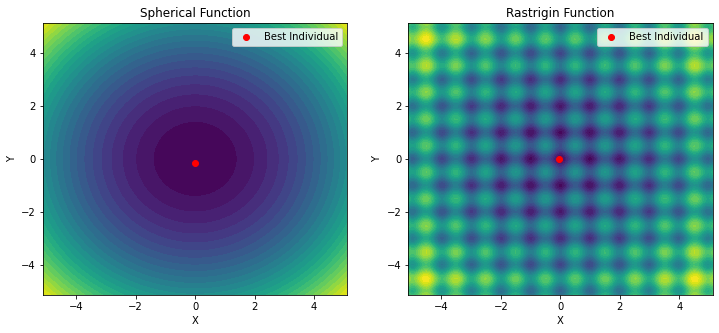

XD


In [39]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Funkcja celu - sferyczna
def spherical_function(x, y):
    return x**2 + y**2

# Funkcja celu - Rastrigin
def rastrigin_function(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * math.pi * x)) + (y**2 - A * np.cos(2 * math.pi * y))

# Inicjalizacja populacji
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        x = random.uniform(-5.12, 5.12)
        y = random.uniform(-5.12, 5.12)
        population.append([x, y])
    return population

# Algorytm genetyczny
def genetic_algorithm(population_size, fitness_func, num_generations):
    population = initialize_population(population_size)
    best_fitness = float('inf')
    best_individual = None
    generation_data = []

    for generation in range(num_generations):
        fitness_scores = []
        for individual in population:
            fitness = fitness_func(*individual)
            fitness_scores.append(fitness)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        generation_data.append((generation, population, fitness_scores))

        selected = tournament_selection(population, fitness_scores, tournament_size=3)
        offspring = []

        while len(offspring) < population_size:
            parent1 = random.choice(selected)
            parent2 = random.choice(selected)
            child1, child2 = single_point_crossover(parent1, parent2)
            child1 = mutation(child1, mutation_rate=0.1)
            child2 = mutation(child2, mutation_rate=0.1)
            offspring.append(child1)
            offspring.append(child2)

        population = offspring

    return best_individual, best_fitness, generation_data

# Selekcja turniejowa
def tournament_selection(population, fitness_scores, tournament_size):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(range(len(population)), tournament_size)
        tournament_fitness = [fitness_scores[i] for i in tournament]
        winner_index = tournament_fitness.index(min(tournament_fitness))
        winner = population[tournament[winner_index]].copy()
        selected.append(winner)
    return selected

# Krzyżowanie jednopunktowe
def single_point_crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutacja
def mutation(individual, mutation_rate):
    x, y = individual
    if random.random() < mutation_rate:
        x = random.uniform(-5.12, 5.12)
    if random.random() < mutation_rate:
        y = random.uniform(-5.12, 5.12)
    return [x, y]

# Parametry algorytmu genetycznego
population_size = 50
num_generations = 50

# Wywołanie algorytmu dla funkcji celu sferycznej
best_individual_spherical, best_fitness_spherical, _ = genetic_algorithm(
    population_size, spherical_function, num_generations
)
print("Spherical Function - Best Individual:", best_individual_spherical)
print("Spherical Function - Best Fitness:", best_fitness_spherical)

# Wywołanie algorytmu dla funkcji celu Rastrigin
best_individual_rastrigin, best_fitness_rastrigin, _ = genetic_algorithm(
    population_size, rastrigin_function, num_generations
)
print("Rastrigin Function - Best Individual:", best_individual_rastrigin)
print("Rastrigin Function - Best Fitness:", best_fitness_rastrigin)

# Wykres ostatecznych wartości fitness
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z_spherical = spherical_function(X, Y)
Z_rastrigin = rastrigin_function(X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.contourf(X, Y, Z_spherical, levels=30, cmap='viridis')
ax1.scatter(best_individual_spherical[0], best_individual_spherical[1], color='red', label='Best Individual')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Spherical Function')
ax1.legend()

ax2.contourf(X, Y, Z_rastrigin, levels=30, cmap='viridis')
ax2.scatter(best_individual_rastrigin[0], best_individual_rastrigin[1], color='red', label='Best Individual')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Rastrigin Function')
ax2.legend()

plt.show()

print("XD")